\section*{Exercise 3}

In [23]:
import numpy as np
import pandas as pd
import random as rd

In [24]:
df = pd.read_excel (r'data.xlsx')
#print (df)

In [25]:
# set parameters from file
Pstar = df.iloc[0,1]
n0 = df.iloc[1,1]
h = df.iloc[2,1]
deltastar = df.iloc[3,1]

In [26]:
# set data points
data = df.iloc[10:,:]
#data

In [50]:
def Rinott(Pstar, n0, h, deltastar, data):
    nu = n0-1
    h = h # already provided
    
    # step (ii)
    # define a frame that holds all samples
    samples = np.empty([n0, data.shape[1]])
    # collect samples
    for i in np.arange(0, data.shape[1]-1, step = 1):
        samples[:,i] = data.iloc[:n0,i+1]#data.iloc[:,i+1].sample(n=n0, random_state=1)

    # step (iii)
    # summary statistics calculations
    stats = np.empty([data.shape[1]-1,4])
    for i in np.arange(0, data.shape[1]-1, step = 1):
        stats[i,0] = np.mean(samples[:,i])
        stats[i,1] = np.var(samples[:,i], ddof = 1)
    
    # Stage 2
    
    # step (i)
    for i in np.arange(0, data.shape[1]-1, step = 1):
        stats[i,2] = max(n0, np.ceil(((h*np.sqrt(stats[i,1]))/deltastar)**2))
        if stats[i,2] > n0:
            sample_ext = data.iloc[:,i+1].sample(n = int(stats[i,2] - n0), random_state = 2)
            
        # step (ii)        
            stats[i,3] = np.mean(np.concatenate((samples[:,i], sample_ext), axis = 0))
        else:
            stats[i,3] = np.mean(samples[:,i])
        
    # step (iii)
    istar = np.argmax(stats[:,3])+1

    # step (iv)
    print("Sample", istar, "is the rv associated with the largest mu of", round(max(stats[:,3]),3)) 
            
    return(stats)

In [51]:
results = Rinott(Pstar, n0, h, deltastar, data)
results = np.round(results,3)
results = pd.DataFrame(results) # transform into data frame
results = results.rename(columns={0: "Ybar^0_i", 1: "S_i^2", 2: "n_i", 3: "Ybar_i"})
results = results.rename(index = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10})
results.to_csv(index=True, path_or_buf = 'results.csv')
results

Sample 10 is the rv associated with the largest mu of 4.339


Ybar^0_i   S_i^2     n_i  Ybar_i
1      4.060   0.807   488.0   4.127
2      4.102   1.303   788.0   4.145
3      4.158   0.882   533.0   4.170
4      3.974   0.094    58.0   3.964
5      4.083   0.089    54.0   4.073
6      4.176   0.119    72.0   4.186
7      3.170   9.970  6024.0   4.010
8      4.132  12.469  7534.0   4.101
9      4.580   7.077  4276.0   4.206
10     4.389  11.788  7122.0   4.339

In [35]:
sum(Yijs)


NameError: name 'Yijs' is not defined

In [28]:
results = Rinott(Pstar, n0, h, deltastar, data)
results = np.round(results,3)
results = pd.DataFrame(results) # transform into data frame
results = results.rename(columns={0: "Ybar^0_i", 1: "S_i^2", 2: "n_i", 3: "Ybar_i"})
results = results.rename(index = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10})
results.to_csv(index=True, path_or_buf = '/Users/fietekrutein/Documents/University/University of Washington/Courses/2020 Q2/IND E 599 Data-driven Optimization/homework/HW 1/Ex3_results.csv')
results

Sample 10 is the rv associated with the largest mu of 4.376


Ybar^0_i  S_i^2     n_i  Ybar_i
1      4.205  0.173   105.0   4.198
2      4.101  0.195   118.0   4.171
3      4.059  0.248   150.0   4.198
4      3.976  0.037    50.0   3.976
5      3.973  0.005    50.0   3.973
6      4.198  0.010    50.0   4.198
7      4.365  2.428  1467.0   4.075
8      4.210  2.474  1496.0   4.086
9      4.633  0.953   577.0   4.310
10     4.699  1.064   643.0   4.376

\section*{Exercise 5}

In [7]:
# set function generator for objective 
def Y(x, sigma):
    return(-x**2 + rd.normalvariate(mu = 0, sigma = sigma))

# initialize the Kiefer-Wolfowitz algorithm
def K_W_alg(n, sigma):
    # initialize array to hold values
    vals = np.empty([0,0])
    # initialize x1
    vals = np.append(vals, rd.uniform(0, 1))
    # iterate for each sample
    for i in np.arange(1,n+1,1):
        # generate a_n and c_n sequence values
        a_n = 1/i
        c_n = 1/(i**(1/3))
        # calculate next x_n
        vals = np.append(vals, vals[i-1] + a_n * ((Y((vals[i-1] + c_n), sigma) - Y((vals[i-1] - c_n), sigma))/(2*c_n)))
    return(vals)

In [8]:
# generate a function that generates multiple runs
def run(n, sigma, iters):
    
    # initialize a matrix holding the values
    # create empty rows that can hold the mean and sd after filling
    runs = np.zeros(n+1)
    runs = np.vstack([runs, np.zeros(n+1)])
    
    # add to the matrix for every additional run
    for i in np.arange(0,iters,1):
        runs = np.vstack([runs, K_W_alg(n, sigma)])
    runs = runs.T
        
    # calculate averages and safe to first two columns
    runs[:,0] = np.std(runs[:,2:], axis = 1)
    runs[:,1] = np.mean(runs[:,2:], axis = 1)
    
    return(runs)

In [9]:
# set reproducible seed
rd.seed(123)

# generate iterations for each sigma setting
rec_1 = run(n = 1000, sigma = 1, iters = 30) 
rec_5 = run(n = 1000, sigma = 5, iters = 30) 
rec_10 = run(n = 1000, sigma = 10, iters = 30)

print("The average obtained for x_1001 is for sigma = 1:", 
      round(rec_1[1000, 1],4), ", for sigma = 5", round(rec_5[1000, 1],4), 
      ", and for sigma = 10", round(rec_10[1000,1],4))

The average obtained for x_1001 is for sigma = 1: 0.0012 , for sigma = 5 -0.0221 , and for sigma = 10 -0.2715


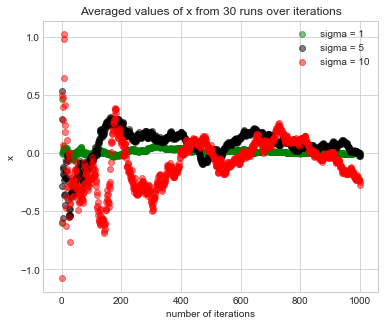

<Figure size 432x288 with 0 Axes>

In [15]:
# Let's plot this all together for averages
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[6,5])

X = np.arange(0,1001,1)
Y1 = rec_1[:,1]
Y2 = rec_5[:,1]
Y3 = rec_10[:,1]

plt.title("Averaged values of x from 30 runs over iterations")
plt.scatter(X,Y1,color='g', label = 'sigma = 1', alpha=0.5)
plt.scatter(X,Y2,color='k', label = 'sigma = 5', alpha=0.5)
plt.scatter(X,Y3,color='r', label = 'sigma = 10', alpha=0.5)
plt.ylabel('x')
plt.xlabel('number of iterations')
plt.legend(numpoints = 1)
plt.show()

plt.savefig('avg_xn.png')

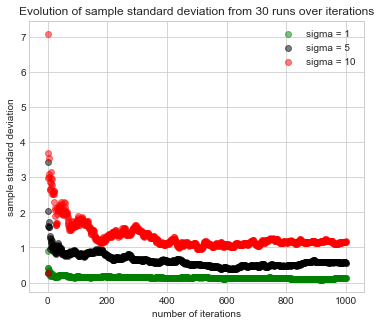

<Figure size 432x288 with 0 Axes>

In [16]:
# Let's plot this for standard deviation
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[6,5])

X = np.arange(0,1001,1)
Y1 = rec_1[:,0]
Y2 = rec_5[:,0]
Y3 = rec_10[:,0]

plt.title("Evolution of sample standard deviation from 30 runs over iterations")
plt.scatter(X,Y1,color='g', label = 'sigma = 1', alpha=0.5)
plt.scatter(X,Y2,color='k', label = 'sigma = 5', alpha=0.5)
plt.scatter(X,Y3,color='r', label = 'sigma = 10', alpha=0.5)
plt.ylabel('sample standard deviation')
plt.xlabel('number of iterations')
plt.legend(numpoints = 1)
plt.show()

plt.savefig('sample_sd.png')